<span style="font-size: 10pt; color: gray; float: right;">
    Copyright &copy; Geoffrey Lentner 2019. All Rights Reserved.
</span><br>
<span style="font-size: 10pt; color: gray; float: right;">
    Research Computing. Purdue University.
</span>

# Better Scientific Visualizations

<span style="font-size: 14pt; font-weight: 300; color: gray;">
    A workshop on producing better graphics with Matplotlib
</span>

---

## Basic Plot

Note: Cartopy is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.



In [1]:
import numpy as num
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
N = 1000
x = num.linspace(1, N - 1, N)
y = num.random.normal(size=N)

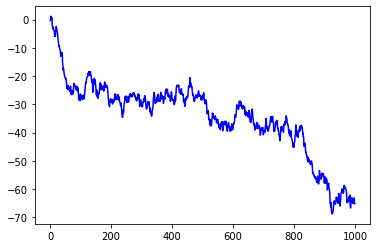

In [4]:
plot.plot(x, y.cumsum(), 'b-');

## Add more configuration

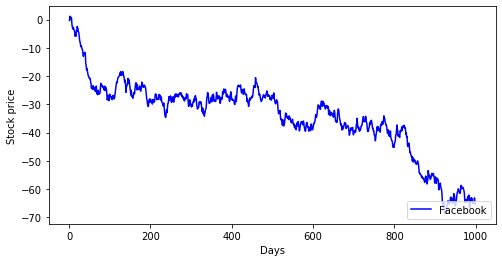

In [8]:
A = plot.figure("my plot", figsize=(8,4))
plot.plot(x, y.cumsum(), 'b-', label="Facebook")
plot.xlabel("Days")
plot.ylabel("Stock price")
plot.legend(loc="lower right")


In [9]:
A
type(A)

matplotlib.figure.Figure

---

## Reproducing Seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

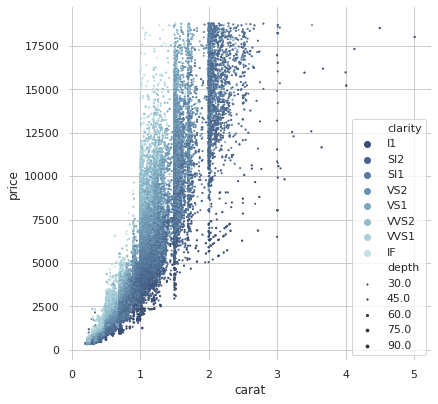

In [10]:
diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax);

## Build a plot step by step using matplotlib

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
diamonds = sns.load_dataset("diamonds")
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


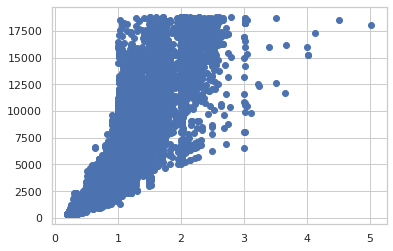

In [13]:
plt.scatter(diamonds.carat, diamonds.price)

In [27]:
diamonds = diamonds.assign(clarity_value = -1)


In [28]:
clarity_ranking = reversed(["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])

for i, label in enumerate(clarity_ranking):
    diamonds.loc[diamonds.clarity ==label, "clarity_value"]=i
    
diamonds.clarity_value.unique()

array([6, 5, 3, 4, 2, 1, 7, 0])

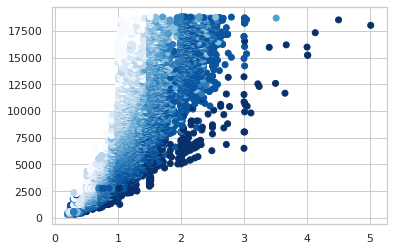

In [29]:
plt.scatter(diamonds.carat, diamonds.price, c=diamonds.clarity_value, cmap="Blues")

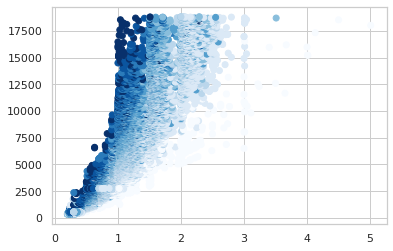

In [31]:
## reverse the color use "Blues_r"
plt.scatter(diamonds.carat, diamonds.price, 
            c=diamonds.clarity_value, cmap="Blues_r")

---

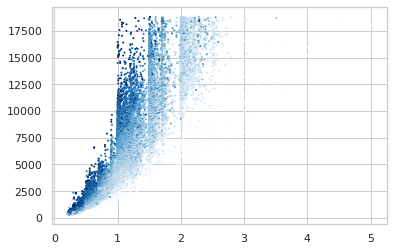

In [32]:
plt.scatter(diamonds.carat, diamonds.price, c=diamonds.clarity_value, cmap="Blues_r", s=1)

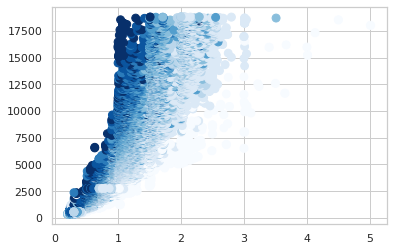

In [33]:
plt.scatter(diamonds.carat, diamonds.price, 
            c=diamonds.clarity_value, cmap="Blues_r", s=diamonds.depth)

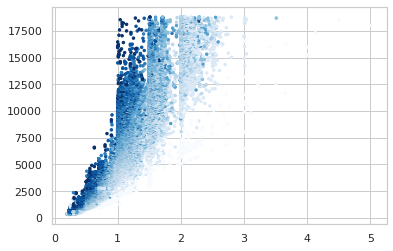

In [35]:
### Scale the depth
plt.scatter(diamonds.carat, diamonds.price, 
            c=diamonds.clarity_value, cmap="Blues_r", s=diamonds.depth/10)
plot.grid(True)

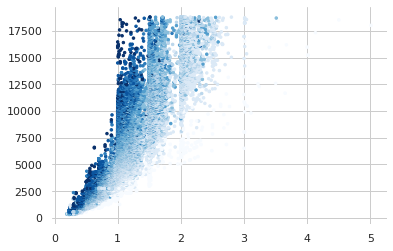

In [46]:
### Scale the depth
A=plt.scatter(diamonds.carat, diamonds.price, 
            c=diamonds.clarity_value, cmap="Blues_r", 
            s=diamonds.depth/10, zorder=30)
plot.grid(True)

### TO remove the boxes
axes = plot.gca() 
for edge in 'left', "right", "top", "bottom":
    axes.spines[edge].set_visible(False)


In [47]:
A.zorder

30

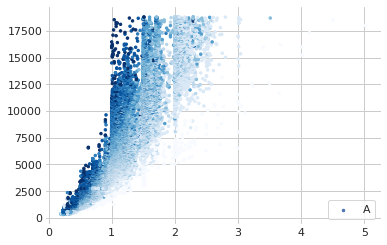

In [63]:
### Scale the depth
A=plt.scatter(diamonds.carat, diamonds.price, 
            c=diamonds.clarity_value, cmap="Blues_r", 
            s=diamonds.depth/10, zorder=30, label="A")
plot.grid(True)

### TO remove the boxes
axes = plot.gca() 
for edge in 'left', "right", "top", "bottom":
    axes.spines[edge].set_visible(False)

axes.tick_params(axis="both", length=0)
## Label has to be set. 
plot.legend(loc="lower right")

## Full Example

<img src="docs/images/muon_lifetime.png" width="70%">

In [53]:
from pandas import DataFrame, read_csv
from scipy.optimize import curve_fit
import numpy as num
num.random.seed(42)

In [70]:
import matplotlib.pyplot as plot
%matplotlib inline

In [55]:
data = read_csv('data/muon_decay.csv', index_col='channel')
data = data.assign(error = num.sqrt(data['count']), 
                   time  = data.index * 0.64 / 119.32)
data.head()

,count,error,time
channel,,,
0,0,0.0,0.000000
1,0,0.0,0.005364
2,0,0.0,0.010727
3,0,0.0,0.016091
4,0,0.0,0.021455


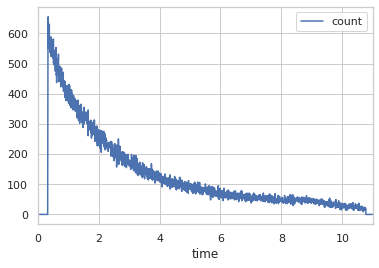

In [56]:
data.plot(x='time', y='count');

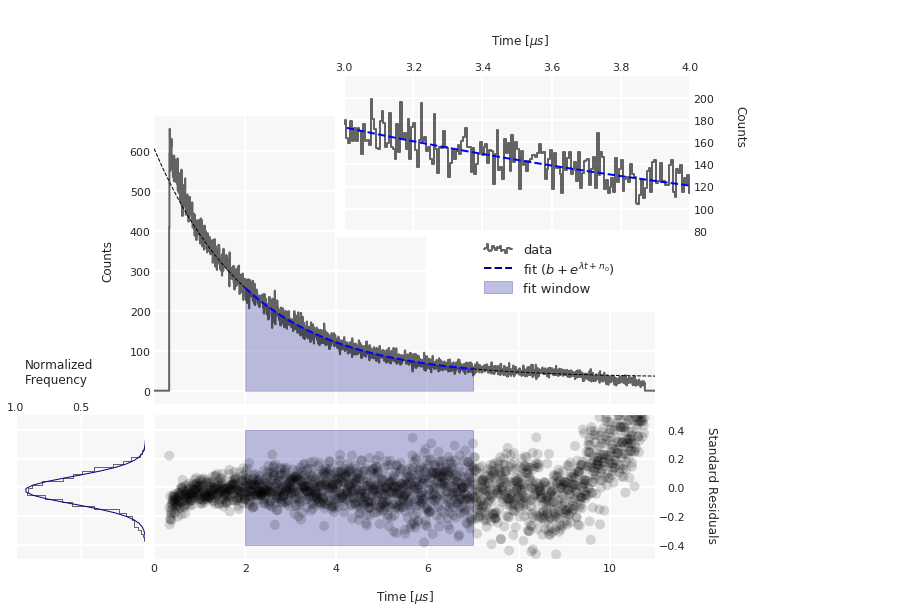

In [84]:
# create figure for time calibration
figure = plot.figure("Muon Lifetime", figsize=(12, 8))
axes   = {"main":     figure.add_axes([0.19, 0.35,  0.58, 0.50]),
          "back":     figure.add_axes([0.40, 0.64,  0.65, 0.40]),
           "inlet":    figure.add_axes([0.41, 0.65, 0.40, 0.27]),
           "residual": figure.add_axes([0.19, 0.08,  0.58, 0.25]),
           "gaussian": figure.add_axes([0.03, 0.08,  0.15, 0.25])}



#solid white background for "back" axes
axes['back'].set_facecolor('white')

#hide tick labels
axes["back"].yaxis.set_ticks([])
axes["back"].xaxis.set_ticks([])

#hide x-axis ticks for main and gaussian
for label in axes["main"].get_xticklabels():
    label.set_alpha(0)
    
# move tick labels to the outsite for inlet
axes["inlet"].yaxis.tick_right()
axes["inlet"].xaxis.tick_top()
axes["residual"].yaxis.tick_right()
axes["gaussian"].xaxis.tick_top()

# axis limits
axes["main"].set_xlim(left=0, right=11)
axes["inlet"].set_xlim(left=3, right=4)
axes["inlet"].set_ylim(bottom=80, top=220)
axes["residual"].set_ylim(bottom=-0.5, top=0.5)
axes["gaussian"].set_ylim(bottom=-0.5, top=0.5)
axes["gaussian"].set_xlim(left=1, right=0)
axes["residual"].set_xlim(left=0, right=11)

# labels
axes["main"].set_ylabel("Counts", fontsize=12, labelpad=15)
figure.text(0.86, 0.80, "Counts", fontsize=12, rotation=270)
figure.text(0.58, 0.975,  "Time [$\mu s$]", fontsize=12)

## $ $ means this is a latex math symbol
axes["residual"].set_xlabel("Time [$\mu s$]", fontsize=12, labelpad=15)
figure.text(0.835, 0.21, "Standard Residuals", rotation=270, fontsize=12, 
            va="center", ha="center")
figure.text(0.04, 0.385, "Normalized\nFrequency", fontsize=12, ha="left")

# data as 'stepped' counts
for key in "main", "inlet":
    axes[key].step(data['time'], data['count'],
                   color="black", zorder=5, where="mid", lw=2, alpha=0.6)

# select central region of spectrum
sample = data[(data['time'] > 2) & (data['time'] < 7)]

def model(x, *p):
    """Poisson distribution over a polynomial background."""
    return p[0] + num.exp(p[1] * x - p[2])

#fit exponential over linear-background to data
popt, pcov = curve_fit(model, sample['time'], sample['count'],
                       sigma=sample['error'], p0=[0, -1/4, 0], 
                       absolute_sigma=True, maxfev=10000)

# overlay the fit
for key in 'main', 'inlet':
    axes[key].plot(sample['time'], model(sample['time'], *popt),
                   '--', color='blue', zorder=10, lw=2)

# hide "220" on 'inlet'
axes['inlet'].get_yticklabels()[-1].set_alpha(0)

# overlay the fit (outside the window)
axes['main'].plot(num.linspace(0, 2, 1000), 
                  model(num.linspace(0, 2, 1000), *popt),
                  '--', color='black', lw=1, zorder=10)
axes['main'].plot(num.linspace(7, 12, 1000), 
                  model(num.linspace(7, 12, 1000), *popt),
                  '--', color='black', lw=1, zorder=10)

# residuals
data['model'] = model(data['time'], *popt)
data['residual'] = (data['model'] - data['count']) / data['model']
axes['residual'].scatter(data['time'], data['residual'], edgecolor='none', 
                         facecolor='black', marker='o', zorder=10, alpha=0.15, s=100)

# percent (no-sign) tick labels (residual plot)
# add padding to 0.2 and 0.4
for tick in axes['residual'].yaxis.get_major_ticks()[3:]:
    tick.set_pad(12)

# fit window for residual plot
axes['residual'].fill_between([2, 7], [-0.4]*2, [0.4]*2, zorder=5, color='darkblue', alpha=0.25)

# fill under profile on 'main' curve
axes['main'].fill_between(sample.time, num.zeros(len(sample.time)),
                          model(sample['time'], *popt),
                          color='darkblue', zorder=5, alpha=0.25)

# legend patch
axes['main'].fill_between([6, 12], [400]*2, [200]*2, color='white', zorder=10)

# legend (main) 'data'
axes['main'].text(8.1, 345, 'data', fontsize=13, zorder=15)
axes['main'].step(num.linspace(7.25, 7.85, 20), [355 + 7.5*num.random.normal() for i in range(20)], 
                  color='black', zorder=15, where='mid', lw=2, alpha=0.6)

# legend (main) 'fit'
axes['main'].text(8.1, 305, 'fit ($b + e^{\lambda t + n_0}$)', fontsize=13, va='center', zorder=15)
axes['main'].plot([7.25, 7.85], [307]*2, '--', color='darkblue', zorder=15, lw=2)

# legend (main) 'window'
axes['main'].text(8.1, 255, 'fit window', fontsize=13, va='center', zorder=15)
axes['main'].fill_between([7.25, 7.85], [245]*2, [275]*2, color='darkblue', zorder=15, alpha=0.25)


# re-select central region of spectrum (to include residuals)
sample = data[(data['time'] > 2) & (data['time'] < 7)]

# histogram of the residuals within the 'window'
hist, bin_edges = num.histogram(sample['residual'], weights=sample['error'], bins=30)
bin_centers     = (bin_edges[:-1] + bin_edges[1:]) / 2
axes['gaussian'].step(hist / hist.max(), bin_centers, color='black', zorder=5, lw=1,
                      alpha=0.6, where='mid')
axes['gaussian'].xaxis.set_ticks([1.0, 0.5, 0.0])
axes['gaussian'].yaxis.set_ticks([-0.4, -0.2, 0.0, 0.2, 0.4])

# hide '0.0'
axes['gaussian'].get_xticklabels()[-1].set_alpha(0)

# fit simple gaussian profile to histogram
gaussian = lambda x, *p: p[0] * num.exp(-0.5 * (x - p[1])**2 / p[2]**2)
popt_, pcov_ = curve_fit(gaussian, bin_centers, hist, p0=[1.0, 0, 0.1])
axes['gaussian'].plot(gaussian(bin_centers, *[0.93, -0.02, 0.095]), bin_centers, 
                      '-', color='darkblue', zorder=10, lw=1)

for label, ax in axes.items():
    ax.tick_params(axis='both', which='both', length=0)
    for edge, spine in ax.spines.items():
        spine.set_visible(False)
    if label != 'back':
        ax.set_facecolor([247/255]*3)
        ax.grid(True, color='white', lw=2)
        
# hide y-ticks
for label in axes['gaussian'].yaxis.get_majorticklabels():
    label.set_visible(False)

In [86]:
figure.savefig("naugty_figure.pdf")
figure.savefig("naugty_figure.png", format="png" ,ppi=1200)


---

## Live Excercise

matplotlib subplot

<br><br><br><br><br>

<br><br><br><br><br>

<br><br><br><br><br>

<br><br><br><br><br>